In [1]:
import numpy as np
from statsmodels.tsa.stattools import ccovf
from statsmodels.tsa.stattools import acovf
from statsmodels.tsa.stattools import ccf
from scipy.linalg import solve_continuous_lyapunov
from numba import jit
from scipy import signal
from scipy.linalg import expm
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
import matplotlib.cm as cm
from matplotlib import colors
from ipywidgets import interactive 
from ipywidgets import fixed
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
from helper_functions.helpers import *

# Figure 1

## Panel b: deterministic rates, stable

This first cell computes what $\mu$ has to be in order to result in a chosen network operating point. For this figure, we have chosen $\bar{r} = (30,30,35)^\top.$

In [3]:
Wee = 1.15
Wei = 1
Wie = 1
Wii = 0.5
alpha = 0.15

r_bar = np.array([[30],[30],[35]])
W = np.block([
        [Wee, alpha*Wee, -Wei],
        [alpha*Wee, Wee, -Wei],
        [Wie, Wie, -Wii]
    ])
mu_0 = (np.eye(3)-W)@r_bar

The global inhibition motif is stable if $\alpha > 1-(1/W_{EE})$. This threshold for these parameters is

In [4]:
1-(1/Wee)

0.13043478260869557

Since $\alpha = 0.15$ exceeds this threshold, the network is stable.

We run the network and after a time, introduce a small perturbation $\delta$ to the excitatory rates. If the network is in a stable regime, we expect the rates to make a small deviation from $\bar{r}$ once the perturbation is applied, then return.

In [5]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0 = np.array([[30], [30], [35]]),
                                                     T=1500, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=True,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=1,
                                                     Wie=1,
                                                     mu=mu_0,
                                                     alpha = 0.15)

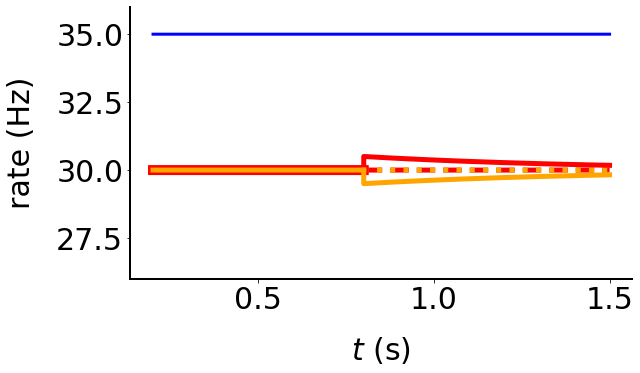

In [6]:
fig, ax = plt.subplots(figsize=(9,5))
start = 20000
#start = 0
times=.01*ts[start:]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)
ax.set_ylim(26,36)

ax.plot(.01*ts[80_000:]/1000, R_ss[0,80_000:], linewidth=5, linestyle='dashed', color='red', label=r'$\bar{r}_{E_1}$')
ax.plot(.01*ts[80_000:]/1000, R_ss[1,80_000:], linewidth=5, linestyle='dotted', color='orange', label=r'$\bar{r}_{E_2}$')

ax.plot(.01*ts[start:80_000]/1000, R_p[0,start:80_000], linewidth=10, linestyle='-', color='red')
ax.plot(.01*ts[80_000:]/1000, R_p[0,80_000:], linewidth=5, linestyle='-', color='red')

ax.plot(.01*ts[start:80_000]/1000, R_p[1,start:80_000], linewidth=5, linestyle='-', color='orange')
ax.plot(.01*ts[80_000:]/1000, R_p[1,80_000:], linewidth=5, linestyle='-', color='orange')

ax.plot(times, R_ss[2,start:], linewidth=3, linestyle='-', color='blue', alpha=1)

plt.savefig('figs/Fig1_Panel_b.pdf', bbox_inches='tight')
plt.show()

## Panel c: deterministic rates, winner-take-all dynamics

Consider $\alpha = 0.10$. In this case, the global inhibition network is unstable, and exhibits winner-take-all dynamics:

In [7]:
Wee = 1.15
Wei = 1
Wie = 1
Wii = 0.5
alpha = 0.10

r_bar = np.array([[30],[30],[35]])
W = np.block([
        [Wee, alpha*Wee, -Wei],
        [alpha*Wee, Wee, -Wei],
        [Wie, Wie, -Wii]
    ])
mu_0 = (np.eye(3)-W)@r_bar

In [8]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     r0 = r_bar,
                                                     T=1500, 
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=True,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=1.15,
                                                     Wii=0.5,
                                                     Wei=1,
                                                     Wie=1,
                                                     mu=mu_0,
                                                     alpha = 0.10)

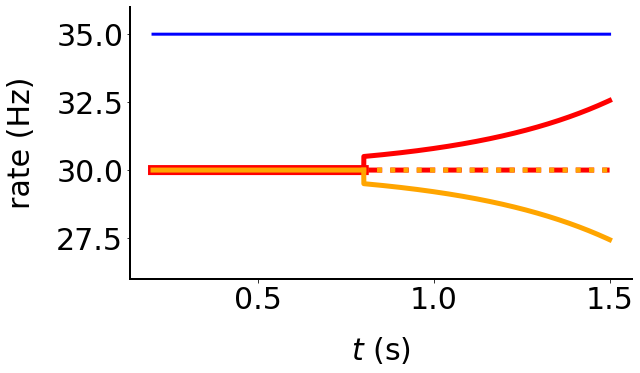

In [9]:
fig, ax = plt.subplots(figsize=(9,5))
start = 20000
#start = 0
times=.01*ts[start:]/1000

ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$t$ (s)', fontsize=30, labelpad=20)
ax.set_ylabel(r'rate (Hz)', fontsize=30, labelpad=20)
ax.set_ylim(26,36)

ax.plot(.01*ts[80_000:]/1000, R_ss[0,80_000:], linewidth=5, linestyle='dashed', color='red', label=r'$\bar{r}_{E_1}$')
ax.plot(.01*ts[80_000:]/1000, R_ss[1,80_000:], linewidth=5, linestyle='dotted', color='orange', label=r'$\bar{r}_{E_2}$')

ax.plot(.01*ts[start:80_000]/1000, R_p[0,start:80_000], linewidth=10, linestyle='-', color='red')
ax.plot(.01*ts[80_000:]/1000, R_p[0,80_000:], linewidth=5, linestyle='-', color='red')

ax.plot(.01*ts[start:80_000]/1000, R_p[1,start:80_000], linewidth=5, linestyle='-', color='orange')
ax.plot(.01*ts[80_000:]/1000, R_p[1,80_000:], linewidth=5, linestyle='-', color='orange')

ax.plot(times, R_ss[2,start:], linewidth=3, linestyle='-', color='blue', alpha=1)

plt.savefig('figs/Fig1_Panel_c.pdf', bbox_inches='tight')
plt.show()

## Supplemental 

/var/folders/3l/tv69nng54nsdx0t5kvn28ksh0000gn/T/ipykernel_11423/3079442220.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  if alpha < 1 - (1/Wee): # WTA dynamics condition


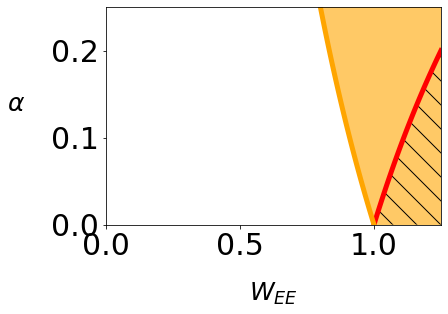

In [10]:
num = 1000
mat1 = np.zeros((num,num))
mat2 = np.zeros((num,num))

alphas = np.linspace(0, .25, num)
Wees = np.linspace(0, 1.25, num)

for i in range(num):
    alpha = alphas[i]
    for j in range(num):
        Wee = Wees[j]
        if Wee > 1/(1+alpha): # ISN condition
            mat1[i,j] = 1
        if alpha < 1 - (1/Wee): # WTA dynamics condition
            mat2[i,j] = 1
            
WTA_mask = np.ma.masked_less(mat2, 1)


fig,ax = plt.subplots()
cmap = colors.ListedColormap(['white', 'orange'])
bounds=[0,.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

im1 = ax.imshow(np.flip(mat1, axis=0), extent=[Wees[0],Wees[-1], alphas[0],alphas[-1]], aspect='auto', cmap=cmap, norm=norm, alpha=0.6)
ax.contourf(WTA_mask, extent=[Wees[0],Wees[-1], alphas[0],alphas[-1]], hatches='\\', alpha=0)

xs1 = np.linspace(1, Wees[-1])
ax.plot(xs1, 1-(1/xs1), linewidth=5, color='red')

xs2 = np.linspace(1/(1+alphas[-1]), 1)
ax.plot(xs2, 1/xs2 -1, linewidth=5, color='orange')

ax.xaxis.set_tick_params(labelsize=30)
ax.yaxis.set_tick_params(labelsize=30)
ax.set_xlabel(r'$W_{EE}$', fontsize=25, labelpad=20)
ax.set_ylabel(r'$\alpha$', rotation=0, fontsize=25, labelpad=35)

plt.savefig('figs/Fig1_Supplement.pdf', bbox_inches='tight')
plt.show()

# Figure 2

## Panel b: correlated rate traces

In [11]:
Wee = Wei = Wie = Wii = 0.5
alpha = 0.15

r_bar = np.array([[30],[30],[35]])
W = np.block([
        [Wee, alpha*Wee, -Wei],
        [alpha*Wee, Wee, -Wei],
        [Wie, Wie, -Wii]
    ])
mu_0 = (np.eye(3)-W)@r_bar
mu_0

array([[30.25],
       [30.25],
       [22.5 ]])

In [12]:
r_ss, r_n, r_p, R_ss, R_n, R_p, W, mu, ts, sigE, sigI = global_inh_model(t0=0, 
                                                     T=2500, 
                                                     r0=r_bar,
                                                     dt=.01,
                                                     t_kick=80_000,
                                                     kick_bool=False,
                                                     kick=.5,
                                                     tau_E=15, 
                                                     tau_I=15, 
                                                     sigE=1, 
                                                     sigI=1,
                                                     c=0.5,
                                                     shared_structure=np.array([[1],[1],[0]]),
                                                     Wee=0.5,
                                                     Wii=0.5,
                                                     Wei=0.5,
                                                     Wie=0.5,
                                                     mu=mu_0,
                                                     alpha = 0.15)

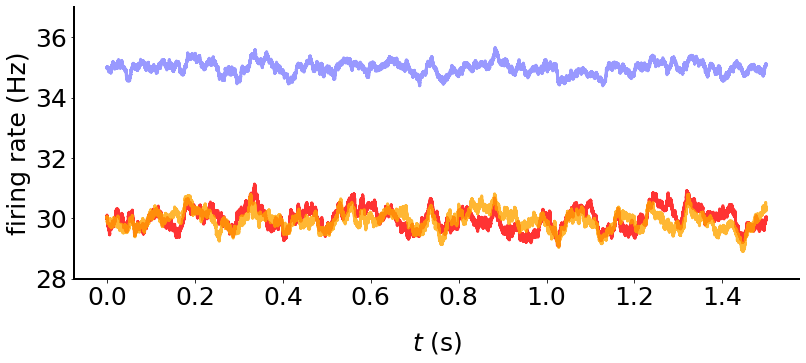

In [13]:
start = 1 
end = 150_000
times = .01*ts[start:end]/1000

fig, ax = plt.subplots(figsize=(13,5))
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.plot(times, R_n[0,start:end], color='red', linestyle='-', linewidth=3, alpha=.8, label=r'$r_{E_1}(t)$')
#plt.plot(times, R_ss[0,start:end], color='red')

ax.plot(times, R_n[1,start:end], color='orange', linestyle='-', linewidth=3, alpha=.8, label=r'$r_{E_2}(t)$')
#plt.plot(times, R_ss[1,start:end], color='orange')

ax.plot(times, R_n[2,start:end], color='blue', linestyle='-', linewidth=3, alpha=.4, label=r'$r_{I}$')
#plt.plot(times, R_ss[2,start:end], color='blue')

ax.xaxis.set_tick_params(labelsize=25)
ax.yaxis.set_tick_params(labelsize=25)
ax.set_xlabel(r'$t$ (s)', fontsize=25, labelpad=20)
ax.set_ylabel('firing rate (Hz)', fontsize=25)
ax.set_ylim(28,37)

#plt.legend(bbox_to_anchor=(.8,.6), loc="upper left", fontsize=25, frameon=False)

#plt.axis('off')
plt.savefig('figs/Fig2_Panel_b.pdf', bbox_inches='tight')
plt.show()

## Panels c and d: matching simulation and theory

In [14]:
from simulation.simulation_functions import *

`autocov_sim` computes the simulated autocovariance function of $\mathbf{r}$. To explain notation: 

- `corrmat11` refers to the simulation data for the autocovariance function $\langle{r_{E_1}(t), r_{E_1}(t+h)\rangle}$ for lags $h \in \mathbb{Z}$. Columns of this array represent the simulated values of the autocovariance function, so that each column corresponds to a distinct realization. 
- Similarly, `corrmat12` refers to the simulation data for the cross-covariance function $\langle r_{E_1}(t), r_{E_2}(t+h) \rangle$, and likewise for the other `corrmat` arrays.
- Averaging over the columns of these `corrmat` arrays gives the theoretical auto/cross-covariance functions.

To perform the simulation, assign arrays to the output of `autocov_sim`. One can save these arrays using `np.save`, like in the following cell: 

In [15]:
# np.save('simulation/autocov_E1-E1', corrmat11)
# np.save('simulation/autocov_E1-E2', corrmat12)
# np.save('simulation/autocov_E1-I', corrmat13)

You can load these arrays, perform additional simulations, and concatenate them: 

In [16]:
corrmat11_stored = np.load('simulation/autocov_E1-E1.npy')
corrmat12_stored = np.load('simulation/autocov_E1-E2.npy')
corrmat13_stored = np.load('simulation/autocov_E1-I.npy')

Run some additional simulations: 

In [17]:
corrmat11_new, corrmat22_new, corrmat23_new, corrmat12_new, corrmat13_new, corrmat33_new = autocov_sim(T=2500, tau_E=15, tau_I=15, sigE=1, sigI=1, c=0.5, shared_structure=np.array([[1],[1],[0]]), Wee=0.5, Wii=0.5, Wei=0.5, Wie=0.5, mu_0=np.array([[30.25], [30.25], [22.5]]), alpha=0.15, num_of_sims=1)

0 of 0


Concatenate the stored arrays with the new simulated data:

In [18]:
corrmat11 = np.c_[corrmat11_stored, corrmat11_new]
corrmat12 = np.c_[corrmat12_stored, corrmat12_new]
corrmat13 = np.c_[corrmat13_stored, corrmat13_new]

Then average the arrays over columns to obtain the desired auto/cross-covariance functions:

In [19]:
tau = 15
dt = 0.01
lags1 = np.arange(-200,200) # lags for theory 
lags2 = np.linspace(-200,200,40_000) # lags for sims 

L = np.eye(3,3)
LW = L@W
Eye = np.eye(3,3)
M = (1/tau)*(-Eye + LW)

c = 0.5
shared_structure = np.array([[1],[1],[0]])
D = np.diagflat([np.sqrt((1-c)*sigE), np.sqrt((1-c)*sigE), np.sqrt((1-c)*sigI)])
D_shared = np.array([[np.sqrt(c*sigE)],
                    [np.sqrt(c*sigE)],
                    [np.sqrt(c*sigI)]])
D_shared = shared_structure*D_shared
D = np.c_[D,D_shared]
D = (1/tau)*np.sqrt(2)*D

Sigma = solve_continuous_lyapunov(-M, D@(D.T))

acf = stationary_acovf(lags1, M, Sigma) # theoretical acf

avg11 = np.mean(corrmat11, axis=1) # averaging 
avg12 = np.mean(corrmat12, axis=1)
avg13 = np.mean(corrmat13, axis=1)

y1 = [x[0,0] for x in acf]
y2 = [x[0,1] for x in acf]
y3 = [x[0,2] for x in acf]

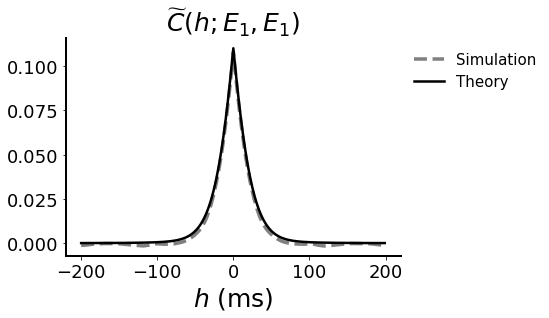

In [20]:
fig, ax = plt. subplots()
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.plot(lags2, avg11[210_000:250_000], color='grey', linestyle='--', linewidth=3.5, label='Simulation')
ax.plot(lags1, y1, color='black', linestyle='-', linewidth=2.5, label='Theory')
plt.title(r'$\widetilde{C}(h; E_1,E_1)$',  fontsize=25)
plt.xlabel(r'$h$ (ms)', fontsize=25)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)

ax.legend(bbox_to_anchor=(1,1), loc="upper left", fontsize=15, frameon=False)
plt.savefig('figs/Fig2_Panel_c.pdf', bbox_inches='tight')
plt.show()

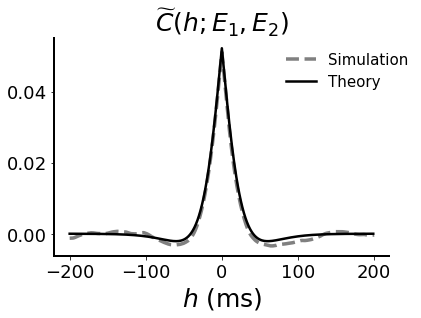

In [21]:
fig, ax = plt. subplots()
ax.spines.left.set_linewidth(2)
ax.spines.bottom.set_linewidth(2)
ax.spines.right.set_color('none')
ax.spines.top.set_color('none')

ax.plot(lags2, avg12[210_000:250_000],  color='grey', linestyle='--', linewidth=3.5, label='Simulation')
ax.plot(lags1, y2, color='black', linestyle='-', linewidth=2.5, label='Theory')
plt.title(r'$\widetilde{C}(h; E_1,E_2)$', fontsize=25)
plt.xlabel(r'$h$ (ms)', fontsize=25)
ax.xaxis.set_tick_params(labelsize=18)
ax.yaxis.set_tick_params(labelsize=18)
plt.legend(bbox_to_anchor=(.65,1), loc="upper left", fontsize=15, frameon=False)
plt.savefig('figs/Fig2_Panel_d.pdf', bbox_inches='tight')
plt.show()

# Figure 3